### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2023 ###

### Final Course Project: Due 5/5/23

# Project title goes here #

#### Lauren Ciha lciha@wisc.edu

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
  1. [Optional Subsection](#4.A.-Feel-free-to-add-subsections)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

To-do lists are great for keeping track of what to do. But they rarely give you a place to start.

Here's an example of some of my weekly tasks this semester:

![todolist.png](todolist.png)

You can see that I have laid out my tasks, put them in a section, and added tags estimating the amount of time it will take me to complete each task. One of these tasks has a subtask.

![subtask.png](subtask.png)

For this assignment, I prefer to print out the worksheet, fill it out, and then upload it as a pdf. In order to do my homework assignment, then, I need to *first* print out the worksheet. Normally, a subtask indicates part of a task that is included in the main task, but in this case, I'm using a subtask to express that a task depends on another, in other words, that I need to finish the subtask before marking the main task as complete.

Currently, Todoist doesn't have a way to label a task as dependent on another. In addition to subtasks, I sometimes express dependency with a '@waiting' tag and then write what I'm waiting for in the task description.

![waiting.png](waiting.png)

Although task dependency may not appear in the Todoist user interface, it's a well-known linear program. (we can define linear program here if needed). There are two models or frameworks we can use to minimize the time it takes to complete tasks when some tasks depend on others. The first is called multi-planning problem and the other is longest-path. With these two models, we can determine what order I should complete my tasks in to minimize the time it takes to do everything. 

**In this project, I'm going to model tasks with dependencies from my own to-do list. From there, I plan to use these models as a starting point for suggesting how to incorporate a task dependency feature into the Todoist app.**




The first few sentences should give a quick overview of the entire project. Then, elaborate with a description of the problem that will be solved, a brief history (with [citations](https://en.wikipedia.org/wiki/Citation)) of how the problem came about, why it's important/interesting, and any other interesting facts you'd like to talk about. You should address and explain where the problem data is coming from (research? the internet? synthetically generated?) Also give an outline of the rest of the report.

This section should be 300-600 words long, and **should be accessible to a general audience** (don't assume your reader has taken the class!). Feel free to include images if you think it'll be helpful:

For more help on using Markdown, see [this reference](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).


## 2. Mathematical models ##

### Generalized Assignment Problem (GAP)

Our to-do list scenario falls under the category of the generalized assignment problem (GAP). In a generalized assignment problem, the goal is to match one set of items to another, given certain constraints. In this problem, we want to match tasks to days of the week. 

Generalized Assignment Problems are a kind of integer program because we are forcing our objective to be an integer value. For example, in this program, there isn't a range of values between days of the week: it's either Monday or Tuesday or Wednesday and so on.


### Assumptions

**For this problem, I will assume that:**
* I know the amount of time it will take me to complete each task.
* I only have a certain amount of time available each day to work on tasks.
* I can only do one task at a time.
* I am doing each task in one and only one sitting.
* There is no travel time or break time needed between tasks.
* Some, but not all, tasks depend on other tasks.

**Before we jump into the decision variables, constraints, and objective, let's get some notation out of the way:**
* Let $\mathcal{T}$ be the set of tasks to complete.
* Let $\mathcal{D}$ be the set of days for the tasks to be completed in.
* Let $\mathcal{P}$ be the set of tasks that are the ancestors of a given task.
* Let $\text{duration}_i$ be the set of task durations for a task i.
* Let $\text{available_work_time}$ be the set of times (in minutes) that I can work each day in $\mathcal{D}$.
* Let $\text{deadlines}_i$ be the set of deadlines for each task in $\mathcal{T}$


### Decision Variables 

For this model, we need to decide which day a task will be done. We can represent this choice with a binary variable $d$ in a $|\mathcal{T}|$ x $|\mathcal{D}|$ matrix such that:

$ d_{i \in \mathcal{T}, j \in \mathcal{D}} = \begin{cases}
1 \quad \text{if task i is completed on day j} \\
0 \quad \text{otherwise}
\end{cases}$

The model will generate a $d$ matrix where we can figure out the task-day assignments by seeing which values are 1.

### Constraints


#### Simple constraints:

* Each task must be assigned a day and only one day: $\quad\sum_{j \in \mathcal{D}} d_{ij} = 1$
* The time needed to complete all the tasks in one day cannot exceed the day's available work time: $\quad\sum_{i \in \mathcal{T}, j \in \mathcal{D}} d_{ij}*\text{duration}_{i} \le \text{available_work_time}_j$


#### Boolean constraints

The next two constraints are a bit more complicated because they include boolean logic.

##### Deadline constraint

* Each task must be completed before its deadline:
    We can phrase this constraint as "if $j > deadline_i$, then $d_{ij} = 0$. Using rules from logical constraints, we can write the constraint as the formula:
    
    for $i \in \mathcal{T}$ and $j \in \mathcal{D}$, $j - deadlines_i <= M(1 - d_{ij})$, where $M$ is $|\mathcal{D}|$ - 1

We can see why this works in the following example:

*Case 1: task i's day done j is before i's deadline:*

Suppose $deadlines_i = 2, j = 1 $
    
$-1 \le M(1 - d_{ij})$
    
When $d_{ij} = 1$, the right hand side is 0. When $d_{ij} = 0$, the right hand side is M. In both cases, the inequality holds, so $d_{ij}$ could be 0 or 1.
    
*Case 2: task i's day done j the same as i's deadline:*

Suppose $deadlines_i = j = 2 $

$ 0 \le M(1-dij) $

When $d_{ij} = 1$, the right hand side is 0. When $d_{ij} = 0$, the right hand side is M. Like the case above, the inequality holds in both choices for $d_{ij}$, so $d_{ij} $ could be 0 or 1.
    
*Case 3: task i's day done j is after i's deadline:*

Suppose $deadlines_i = 2, j = 3$

$1 \le M(1-d_{ij}) $ 
    
When $d_{ij} = 0$, the right hand side is M, so the inequality holds. However, when $d_{ij} = 1$, that yields $ 1 \le 0 $, which is an invalid inequality. Therefore, when we set the constraint $ 1 \le 1(1-d_{ij}) $, we force $d_{ij}$ to be zero whenever j is greater than k. As a result, this formula captures the logical constraint in our problem.


##### Precedence constraints

* A task with a precendence constraint cannot occur on a day before its preceding task is done. In other words, if task p precedes q and p occurs on day k, $d_{qj} = 0$ where $j < k$.

We can split the above constraint into two parts:

**Part one: $d_{qj} = 0$ if $k > j$, where task p precedes q, p occurs on day k, and j is the day task q is done.**

Since it's challenging to model strict inequalities as logical constraints, we will use the contrapositive:
* if $d_{qj} = 1$, then $k \le j$ where task p precedes q, p occurs on day k, and q occurs on day j.

Here, we can apply a similar logic rule to the one in the deadline constraint to get:

for $i \in \mathcal{T}$ and $j \in \mathcal{D}, k - j <= M(1-d_{ij})$, where $M$ is $|\mathcal{D}|$ - 1.

This equation forces $d_{ij}$ to be 0 whenever k > j while letting $d_{ij}$ be 0 or 1 when k <= j.

**Part two: if p precedes q**

We can create a constraint $z_{pq}$ in a $|\mathcal{T}|$ x $|\mathcal{T}|$ matrix such that:

$ z_{p \in \mathcal{T}, q \in \mathcal{T}} = \begin{cases}
1 \quad \text{if task p must precede task q} \\
0 \quad \text{otherwise}
\end{cases}$

The $z$ values are set based on the precedence table given.

The key now is to incorporate this z value into the constraint we found above. We can write the logic of the entire constraint as follows:

If task p must precede q and p occurs on day k, $d_{qj} = 0$ where $j < k$.

$\Leftrightarrow$ If $z_{pq} = d_{pk} = 1$, then $k - j \le M(1-d_{qj})$ (part one of this constraint)

Since our if statement's precedent is $z_{pq} = d_{pk} = 1$, we can add $z_{pq}$ to the subtractions in the previous constraint and then translate the whole if statement into a formulaic constraint:

If $z_{pq} = d_{pk} = 1$, then $k - j \le M(1-d_{qj})$ (part one of this constraint)

can be translated to:

###### The set of precedence constraints is:

$\forall p,q \in z, (k - j) - M(2-d_{qj}-z_{pq}) \le M(2-z_{pq}-d_{qj})$

where $M$ is $|\mathcal{D}|$ - 1.

We can show this models the constraint both when $z_{pq} = 0$ and 
when $z_{pq} = 1$.

Suppose $z_{pq} = 1$, $M$ and $|\mathcal{D}|$ - 1.

*Case 1: j (the day q is done) > k (for example, k = 1 and j = 2):*

$$
\begin{aligned} \\
&(1 - 2) - M(2-d_{qj}-1) \le M(2-1-d_{qj})\\
&-1 - M(1-d_{qj}) \le M(1-d_{qj}) \\
&\text{if } d_{qj} = 1: \\
&\qquad\qquad-1 - 0 \le 0 \quad\text{(satisfies inequality)}\\
&\text{if } d_{qj} = 0 \\
&\qquad\qquad-1 - M \le M \quad\text{(satisfies inequality)}\\
\end{aligned}
$$

Since the left hand side will be a negative number minus $M$, $d_{qj}$ can be 0 or 1 whenever j > k.

*Case 2: j (the day q is done) < k (for example, k = 2 and j = 1):*

$$
\begin{aligned} \\
&(2 - 1) - M(2-d_{qj}-1) \le M(2-1-d_{qj})\\
&1 - M(1-d_{qj}) \le M(1-d_{qj}) \\
&\text{if } d_{qj} = 1: \\
&\qquad\qquad1 - 0 \le 0 \quad\text{(cannot satisfy inequality)}\\
&\text{if } d_{qj} = 0 \\
&\qquad\qquad1 - M \le M \quad\text{(satisfies inequality)}\\
\end{aligned}
$$

Since in this case k - j is always positive, the only way to satisfy the inequality is to set d_{qj} to zero. In other words, this equation forces d_{qj} to 0 whenever j < k or whenever a task could occur on the day before its preceding task is done.

*Case 3: j (the day q is done) = k (for example, k = j = 2)*

$$
\begin{aligned} \\
&(2 - 2) - M(2-d_{qj}-1) \le M(2-1-d_{qj}) \\
&0 - M(1-d_{qj}) \le M(1-d_{qj}) \\
&\text{if } d_{qj} = 1: \\
&\qquad\qquad0 \le 0 \quad\text{(satisfies inequality)}\\
&\text{if } d_{qj} = 0 \\
&\qquad\qquad-M \le M \quad\text{(satisfies inequality)}\\
\end{aligned}
$$

Since we will always get a situation where $-M <= M, d_{qj}$ can be zero or one whenever a task and its preceding task are done on the same day. One limitation of this model is that it cannot put tasks in absolute order, just assign tasks to days in a way that satisfies the precedence constraints.
           
A similar exercise can show that the formula satisifes the constraint when $z_{pq} = 0$. For brevity, I will just give the inequalities for the three cases with $z_{pq} = 0$ and $M$ = $|\mathcal{D}|$ - 1. When $z_{pq} = 0$, $d_{pq}$ can be either zero or one in all three cases.

*Case 1: j (the day q is done) > k (for example, k = 1 and j = 2)*

$$
\begin{aligned}
&\text{(a negative number)} - M(2-d_{pq}) \le M(2-d_{pq})
\end{aligned}
$$

*Case 2: j (the day q is done) < k (for example, k = 2 and j = 1)*

$$
\begin{aligned}
&\text{(a positive number)} - M(2-d_{pq}) \le M(2-d_{pq})
\end{aligned}
$$

*Case 3: j (the day q is done) = k (for example, k = j = 2)*

$$
\begin{aligned}
&0 - M(2-d_{pq}) \le M(2-d_{pq})
\end{aligned}
$$


### Objective

Any solution that satisfies the constraints provides a way to complete my tasks on time, but we can use an objective to influence the schedule provided. For example, in this problem I want to minimize procrastination, so we can write the objective as:

$\text{minimize} \sum d_{ij} * j \qquad \forall i \in \mathcal{T}, \quad \forall j \in \mathcal{D}$

This equation effectively minimizes procrastination because $d_{ij}$ is a binary variable (0 or 1) and we are indexing days with integers (Monday = 1, Tuesday = 2, etc.). Therefore, when we multiply each $d_{ij}$ by j, we will get a smaller summation if each task is completed earlier rather than later.


### In standard form, we can write this as:
$$
\begin{aligned} \\
\text{minimize} \qquad& \sum d_{ij} * j \quad \forall i \in \mathcal{T}, \quad \forall j \in \mathcal{D} \\
& \sum_{j \in \mathcal{D}} d_{ij} = 1 \\
& \sum_{i \in \mathcal{T}, j \in \mathcal{D}} d_{ij} \le |\mathcal{T}| \\
& \sum_{i \in \mathcal{T}, j \in \mathcal{D}} d_{ij}*\text{duration}_{i} \le \text{available_work_time}_j \\
& \forall i \in \mathcal{T} \text{and } j \in \mathcal{D}, j - deadlines_i <= M(1 - d_{ij}) \\
& \forall p,q \in z, (k - j) - M(2-d_{qj}-z_{pq}) \le M(2-z_{pq}-d_{qj}) \\
& M = |\mathcal{D}| - 1
\end{aligned}
$$

$ d_{i \in \mathcal{T}, j \in \mathcal{D}} = \begin{cases}
1 \quad \text{if task i is completed on day j} \\
0 \quad \text{otherwise}
\end{cases}$

$ z_{p \in \mathcal{T}, q \in \mathcal{T}} = \begin{cases}
1 \quad \text{if task p must precede task q} \\
0 \quad \text{otherwise}
\end{cases}$




## 3. Solution ##

We can summarize the information in the to-do list in the following table:

| Task Name                    | Immediate Predecessors | Duration (minutes) |
|------------------------------|------------------------|--------------------|
| 524 homework                 | None                   |        360         |
| 577 homework                 | c                      |        60          |
| print off 577 homework sheet | None                   |        15          |
| 354 homework                 | None                   |        120         |
| 354 project                  | None                   |        360         |
| print off 354 notes sheet    | None                   |        15          |

### Data for the problem:

In [5]:
tasks = ["524 homework", "577 homework", "print off 577 homework sheet", "354 homework",
    "354 project", "print off 354 notes sheet"]

# duration is expressed in minutes (where tasks have a duration in 15 minute intervals)
durations = [ 3*60 60 15 120 6*60 15 ]

# pred stores ancestors on each task
pred = ( [], [3], [], [], [], [] )
num_tasks = length(tasks)

# deadlines for each task - 11:59pm that day is the same as <= deadline + 1
deadlines = [ 3 4 4 1 5 2 ]
    
# Day related data:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
    
# each entry corresponds to a day
available_work_time = [ 5*60 2*60 60 45 7*60]

num_days = length(days)

print()

### Code for Solution: 

In [9]:
using JuMP, HiGHS
m = Model(HiGHS.Optimizer)
set_silent(m)

# day integer variable where d[i,j] == 1 when task i is assigned to day j
@variable(m, d[1:num_tasks, 1:num_days], Bin)

# each task must be assigned a day and only one day
@constraint(m, r2[i=1:num_tasks], sum( d[i,j] for j=1:num_days) == 1)

# the time to complete all tasks in a day can't exceed work time per day
[ @constraint(m, sum(d[i,j]*durations[i] for i=1:num_tasks) <= available_work_time[j]) for j=1:num_days ]

# enforce precedence constraints in d - a task q that follows p cannot happen on a day before p is done
for q=1:num_tasks, p in pred[q]
    for j=1:num_days
        if (d[p,j] == 1)
            for k=1:j-1
                @constraint(m, d[q,k] == 0)
            end
        end
    end
end

# meet deadlines
[ @constraint(m, d[i,j] == 0) for i=1:num_tasks, j=1:num_days if j > deadlines[i]]

# we want to prevent procrastination, so we are going to minimize the last day that all the tasks can be done
@objective(m, Min, sum( d[i,j]*j for i=1:num_tasks, j=1:num_days))

optimize!(m)

D = value.(d)

# dictionary with days and tasks
plan = []
# task - day dictionary
task_assignment = []

for j=1:num_days
    println(days[j],": ")
    day = []
    for i=1:num_tasks
        if (D[i,j] == 1)
            println("\t",tasks[i])
            push!(day, tasks[i])
            push!(task_assignment, (tasks[i], days[j]))
        end
    end
    push!(plan, (days[j], day))
end
println()

Monday: 
	524 homework
	354 homework
Tuesday: 
	577 homework
	print off 577 homework sheet
	print off 354 notes sheet
Wednesday: 
Thursday: 
Friday: 
	354 project



## 4. Results and discussion ##

Here, you display and discuss the results. Show figures, plots, images, trade-off curves, or whatever else you can think of to best illustrate your results. The discussion should explain what the results mean, and how to interpret them. You should also explain the limitations of your approach/model and how sensitive your results are to the assumptions you made.

## Ideas:
Graphs illustrating what the clusters are?


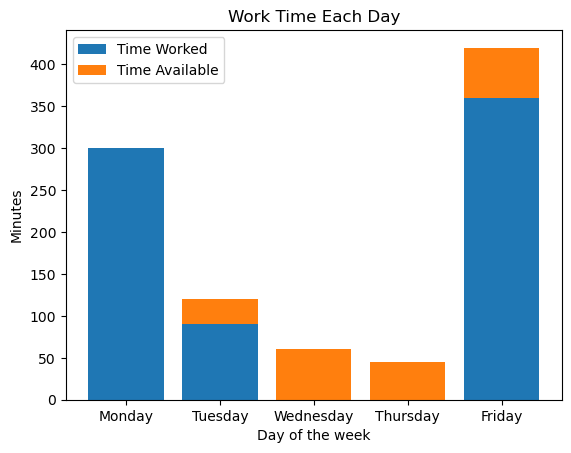

PyObject Text(0.5, 1.0, 'Work Time Each Day')

In [3]:
# How much time is allocated per day?
using PyPlot

total_work_time = []
above = []

for j=1:length(available_work_time)
    push!(total_work_time, sum( D[i,j]*durations[i] for i=1:num_tasks ) )
    push!(above, available_work_time[j] - sum( D[i,j]*durations[i] for i=1:num_tasks ) )
end

plt.bar(days, total_work_time, label="Time Worked")
plt.bar(days, above, bottom=total_work_time, label="Time Available")
plt.ylabel("Minutes")
plt.xlabel("Day of the week")

plt.legend()

plt.title("Work Time Each Day")

In [ ]:
# Given the results above, we can draw out the dependency (house) problem like this:


## 5. Conclusion ##

Summarize your findings and your results, and talk about at least one possible future direction; something that might be interesting to pursue as a follow-up to your project.

## Citations

### Modeling, writing, etc.

### formulating the project itself:
ChatGPT - one line constraints